In [8]:
import sys
sys.path.append('../')
from helpers import helper

import cv2
import numpy as np
from tqdm import tqdm
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
def draw_slash(input, label, center, length, angle, thickness=2):
    # Draw line on image
    radian = helper.convertDegreeToRadian(angle)
    x1 = int(center[0] + length * np.cos(radian))
    y1 = int(center[1] + length * np.sin(radian))
    y2 = int(center[1] - length * np.sin(radian))
    x2 = int(center[0] - length * np.cos(radian))

    input, label = helper.drawLine(input, label, (x1, y1), (x2, y2), thickness)
    return input, label

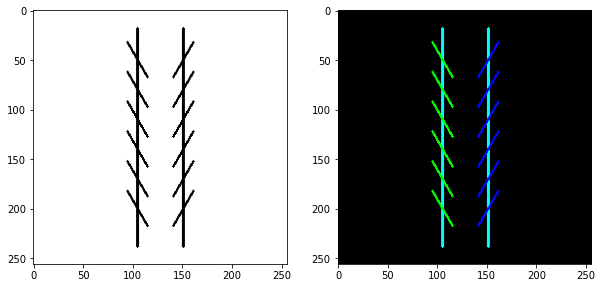

In [9]:
input = np.ones((256, 256, 3), np.uint8) * 255
label = np.zeros((256, 256, 3), np.uint8)

LEFT_POS = 105
RIGHT_POS = 151

def draw_illusion(img, label, angle, thickness=2, interval=30):
    draw_slash(img, label, (LEFT_POS, 128), 110, 90, thickness)
    draw_slash(img, label, (RIGHT_POS, 128), 110, 90, thickness)
    for i in range(50, 225, interval):
        draw_slash(img, label, (LEFT_POS, i), 20, angle, thickness)
        draw_slash(img, label, (RIGHT_POS, i), 20, 180-angle, thickness)

draw_illusion(input, label, 60, 2)
label = cv2.cvtColor(label, cv2.COLOR_HSV2RGB)
figure, axis = plt.subplots(1, 2, figsize=(10, 10))
axis[0].imshow(input)
axis[1].imshow(label)

In [10]:
df = pd.DataFrame(columns=['img_path', 'label_path'])
image_path = '../../datasets/experiment/images/'
label_path = '../../datasets/experiment/labels/'


for angle in range(0, 90, 1):
    for thickness in range(1, 4):
        img = np.ones((256, 256, 3), np.uint8) * 255
        label = np.zeros((256, 256, 3), np.uint8)
        draw_illusion(img, label, angle, thickness)
        label = cv2.cvtColor(label, cv2.COLOR_HSV2BGR)
        cv2.imwrite(image_path + 'img_{}_{}.png'.format(angle, thickness), img)
        cv2.imwrite(label_path + 'label_{}_{}.png'.format(angle, thickness), label)
        new_row = {'image_path': image_path+'img_{}_{}.png'.format(angle, thickness), 'label_path': label_path+'label_{}_{}.png'.format(angle, thickness)}
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

        
df.to_csv('../../datasets/experiment.csv', index=False)